In [1]:
import torch # torch will allow us to create tensors.
import torch.nn as nn # torch.nn allows us to create a neural network.
import torch.nn.functional as F # nn.functional give us access to the activation and loss functions.
from torch.optim import SGD # optim contains many optimizers. Here, we're using SGD, stochastic gradient descent.
import numpy as np
import lightning.pytorch as pl # lightning has tons of cool tools that make neural networks easier
from torch.utils.data import TensorDataset, DataLoader # these are needed for the training data
from torch import float64
import random
from tqdm import tqdm


C:\Users\paras\anaconda3\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [2]:
#input points
x_raw = [0.1,0.2,0.3,0.4]
y_raw = [0.19,0.18,0.36,0.33]

#convert to tensors
x = torch.tensor(x_raw, dtype=float64)
y = torch.tensor(y_raw, dtype=float64)

In [3]:
def plot_graph(x, y, showScatter = False):
    import matplotlib.pyplot as plt
    maxim = max(y)
    minim = min(y)

    # Create a figure
    plt.figure(figsize=(10, 6))

    # Plot the complex function
    plt.plot(x, y, label='Something')

    # Set y-axis limits
    plt.ylim(minim - 0.5 , maxim + 0.5)

    # Add labels and legend
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Blah Blah')
    plt.legend()
    plt.grid(True)

    if showScatter:
        # Plot only the points with a different color
        plt.scatter(x, y, color='red', marker='o')

    # Show the plot
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()



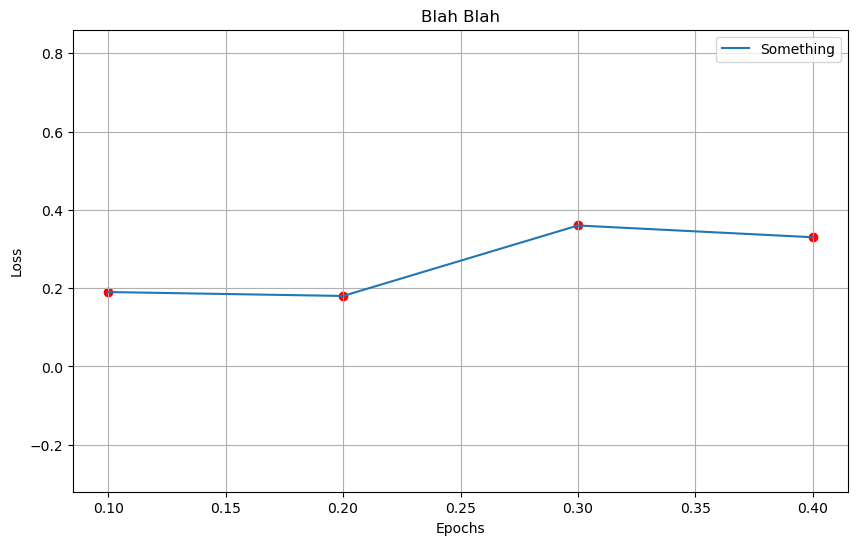

In [4]:
plot_graph(x,y, showScatter=True)

In [55]:
from torch.optim import Adam

# perform fit on degree 1, 2, 4, 8, 16, 32, 64
degrees = [1, 2, 4, 8, 16, 32, 64]


#x is a tensor & c is the constants tensor
def f(x, degree, c):
    res = torch.tensor([0] * len(x), dtype=float64)
    for i, d in enumerate(range(degree, -1, -1)):
        res += c[i] * (x ** d)
    return res

def train(c, degree, optimizer, num_epochs=4000):
    losses=[]
    # print(f"Optimizer is {optimizer}")
    # print(f"Training for degree {degree}")
    # print(f"Constants for degree before training is {c}")
    for epoch in tqdm(range(num_epochs)):
        # print("+" * 50)
        y_p = f(x, degree, c)
        train_loss = torch.sum((y_p - y) ** 2)

        # backward() calculates the derivative for that single value and adds it to the previous one.
        train_loss.backward()

        optimizer.step()  ## take a step toward the optimal value.
        optimizer.zero_grad()

        train_loss = train_loss.detach().numpy()
        losses.append(train_loss)

        # print(f"Epoch #: {epoch} | Epoch loss: {train_loss} \n")
    return losses


def generateConstantsAndOptimzers():
    constants = {deg: torch.tensor([random.random() for i in range(deg + 1)], requires_grad=True) for deg in degrees}
    optimizers = {
            deg: Adam([constants[deg]], lr=0.003,betas=(0.9, 0.999))
            for deg in degrees
        }
    # optimizers = {
    #                 deg:
    #                   random.choice(
    #                       [
    #                         SGD([constants[deg]], lr=random.uniform(0.01, 0.3), momentum=random.uniform(0.5, 0.9)),
    #                         Adam([constants[deg]], lr=random.uniform(0.001, 0.01), betas=(0.9, 0.999))
    #                       ]
    #                   )
    #               for deg in degrees
    #             }
    return constants, optimizers


In [56]:
#repeat the experiment 10 times!
trainLossesForEachTrail = {deg: [] for deg in degrees}
learntConstantsForEachTrail = {deg: [] for deg in degrees}

for trail in tqdm(range(10)):
    # print("#" * 50)
    # print(f"TRAIL #{trail + 1}")
    constants, optimizers = generateConstantsAndOptimzers()
    for deg in tqdm(degrees):
        # print("*" * 50)
        # print(f"\t Training for DEG #{deg}")
        cDeg = constants[deg]
        optDeg = optimizers[deg]
        lossDeg = train(cDeg, deg, optDeg)
        trainLossesForEachTrail[deg].append(lossDeg)
        # print(f"\t Finished Training for DEG #{deg}")
        learntConstantsForEachTrail[deg].append(cDeg)
        # print(f"\t Saved Constants for DEG #{deg} !!")




  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  7%|▋         | 283/4000 [00:00<00:01, 2558.44it/s]

 14%|█▍        | 569/4000 [00:00<00:01, 2706.44it/s]

 22%|██▏       | 881/4000 [00:00<00:01, 2760.17it/s]

 29%|██▉       | 1158/4000 [00:00<00:01, 2732.24it/s]

 36%|███▌      | 1432/4000 [00:00<00:00, 2720.87it/s]

 43%|████▎     | 1734/4000 [00:00<00:00, 2729.08it/s]

 50%|█████     | 2007/4000 [00:00<00:00, 2726.44it/s]

 58%|█████▊    | 2329/4000 [00:00<00:00, 2749.88it/s]

 65%|██████▌   | 2604/4000 [00:00<00:00, 2669.94it/s]

 73%|███████▎  | 2909/4000 [00:01<00:00, 2696.58it/s]

 81%|████████  | 3225/4000 [00:01<00:00, 2708.79it/s]

 88%|████████▊ | 3533/4000 [00:01<00:00, 2730.63it/s]

100%|██████████| 4000/4000 [00:01<00:00, 2738.53it/s]

 14%|█▍        | 1/7 [00:01<00:08,  1.46s/it]

  0%|          | 0/4000 [00:00<?, ?it/s]

  7%|▋         | 290/4000 [00:00<00:01, 2648.05it/s]

 14%|█▍        | 555/4000 [00:00<00:01, 2607.71it/s]

 20%|██   

In [57]:
#test losses
import matplotlib.pyplot as plt
import random

# for each deg plot all the trails
def plot_train_loss_graphs(degLossesAllTrails, deg):
    # Example labels for each line graph
    labels = [f"Trail-{i+1}" for i in range(10)]

    # Generate random colors for each line
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    # Create a figure
    plt.figure(figsize=(40, 23))

    for i in range(10):
        plt.subplot(4,3,i+1)
        plt.plot(list(range(1, len(degLossesAllTrails[i]) + 1)), degLossesAllTrails[i], label=labels[i], color=random.choice(colors))
        # Add legend
        plt.legend()
        # Set labels and title
        plt.xlabel('Epoch')
        plt.ylabel('Training Loss')
        plt.title(f'Degree {deg}')

    #save to disk
    plt.savefig(f"./plots/Training loss plot across 10 trails for degree-{deg}.png")

    # Show the plot
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

def average(l):
    return sum(l)/len(l)

def plot_single_train_loss(trainLossesForEachTrail):
    avg_training_loss_for_deg = {deg: average([loss[-1] for loss in losses]) for deg, losses in trainLossesForEachTrail.items()}

    x = degrees
    y = [avg_training_loss_for_deg[deg] for deg in degrees]

    # Create a figure
    plt.figure(figsize=(40, 23))

    plt.plot(x, y, color='red', marker='o')
    # Add legend
    plt.legend()
    # Set labels and title
    plt.xlabel('Degree')
    plt.ylabel('Avg Training Loss')
    plt.title(f'Avg Training Loss for each deg')

    #save to disk
    plt.savefig(f"./plots/Average Training Loss for each degree.png")

    # Show the plot
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()


**TRAIN LOSS PLOTS**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


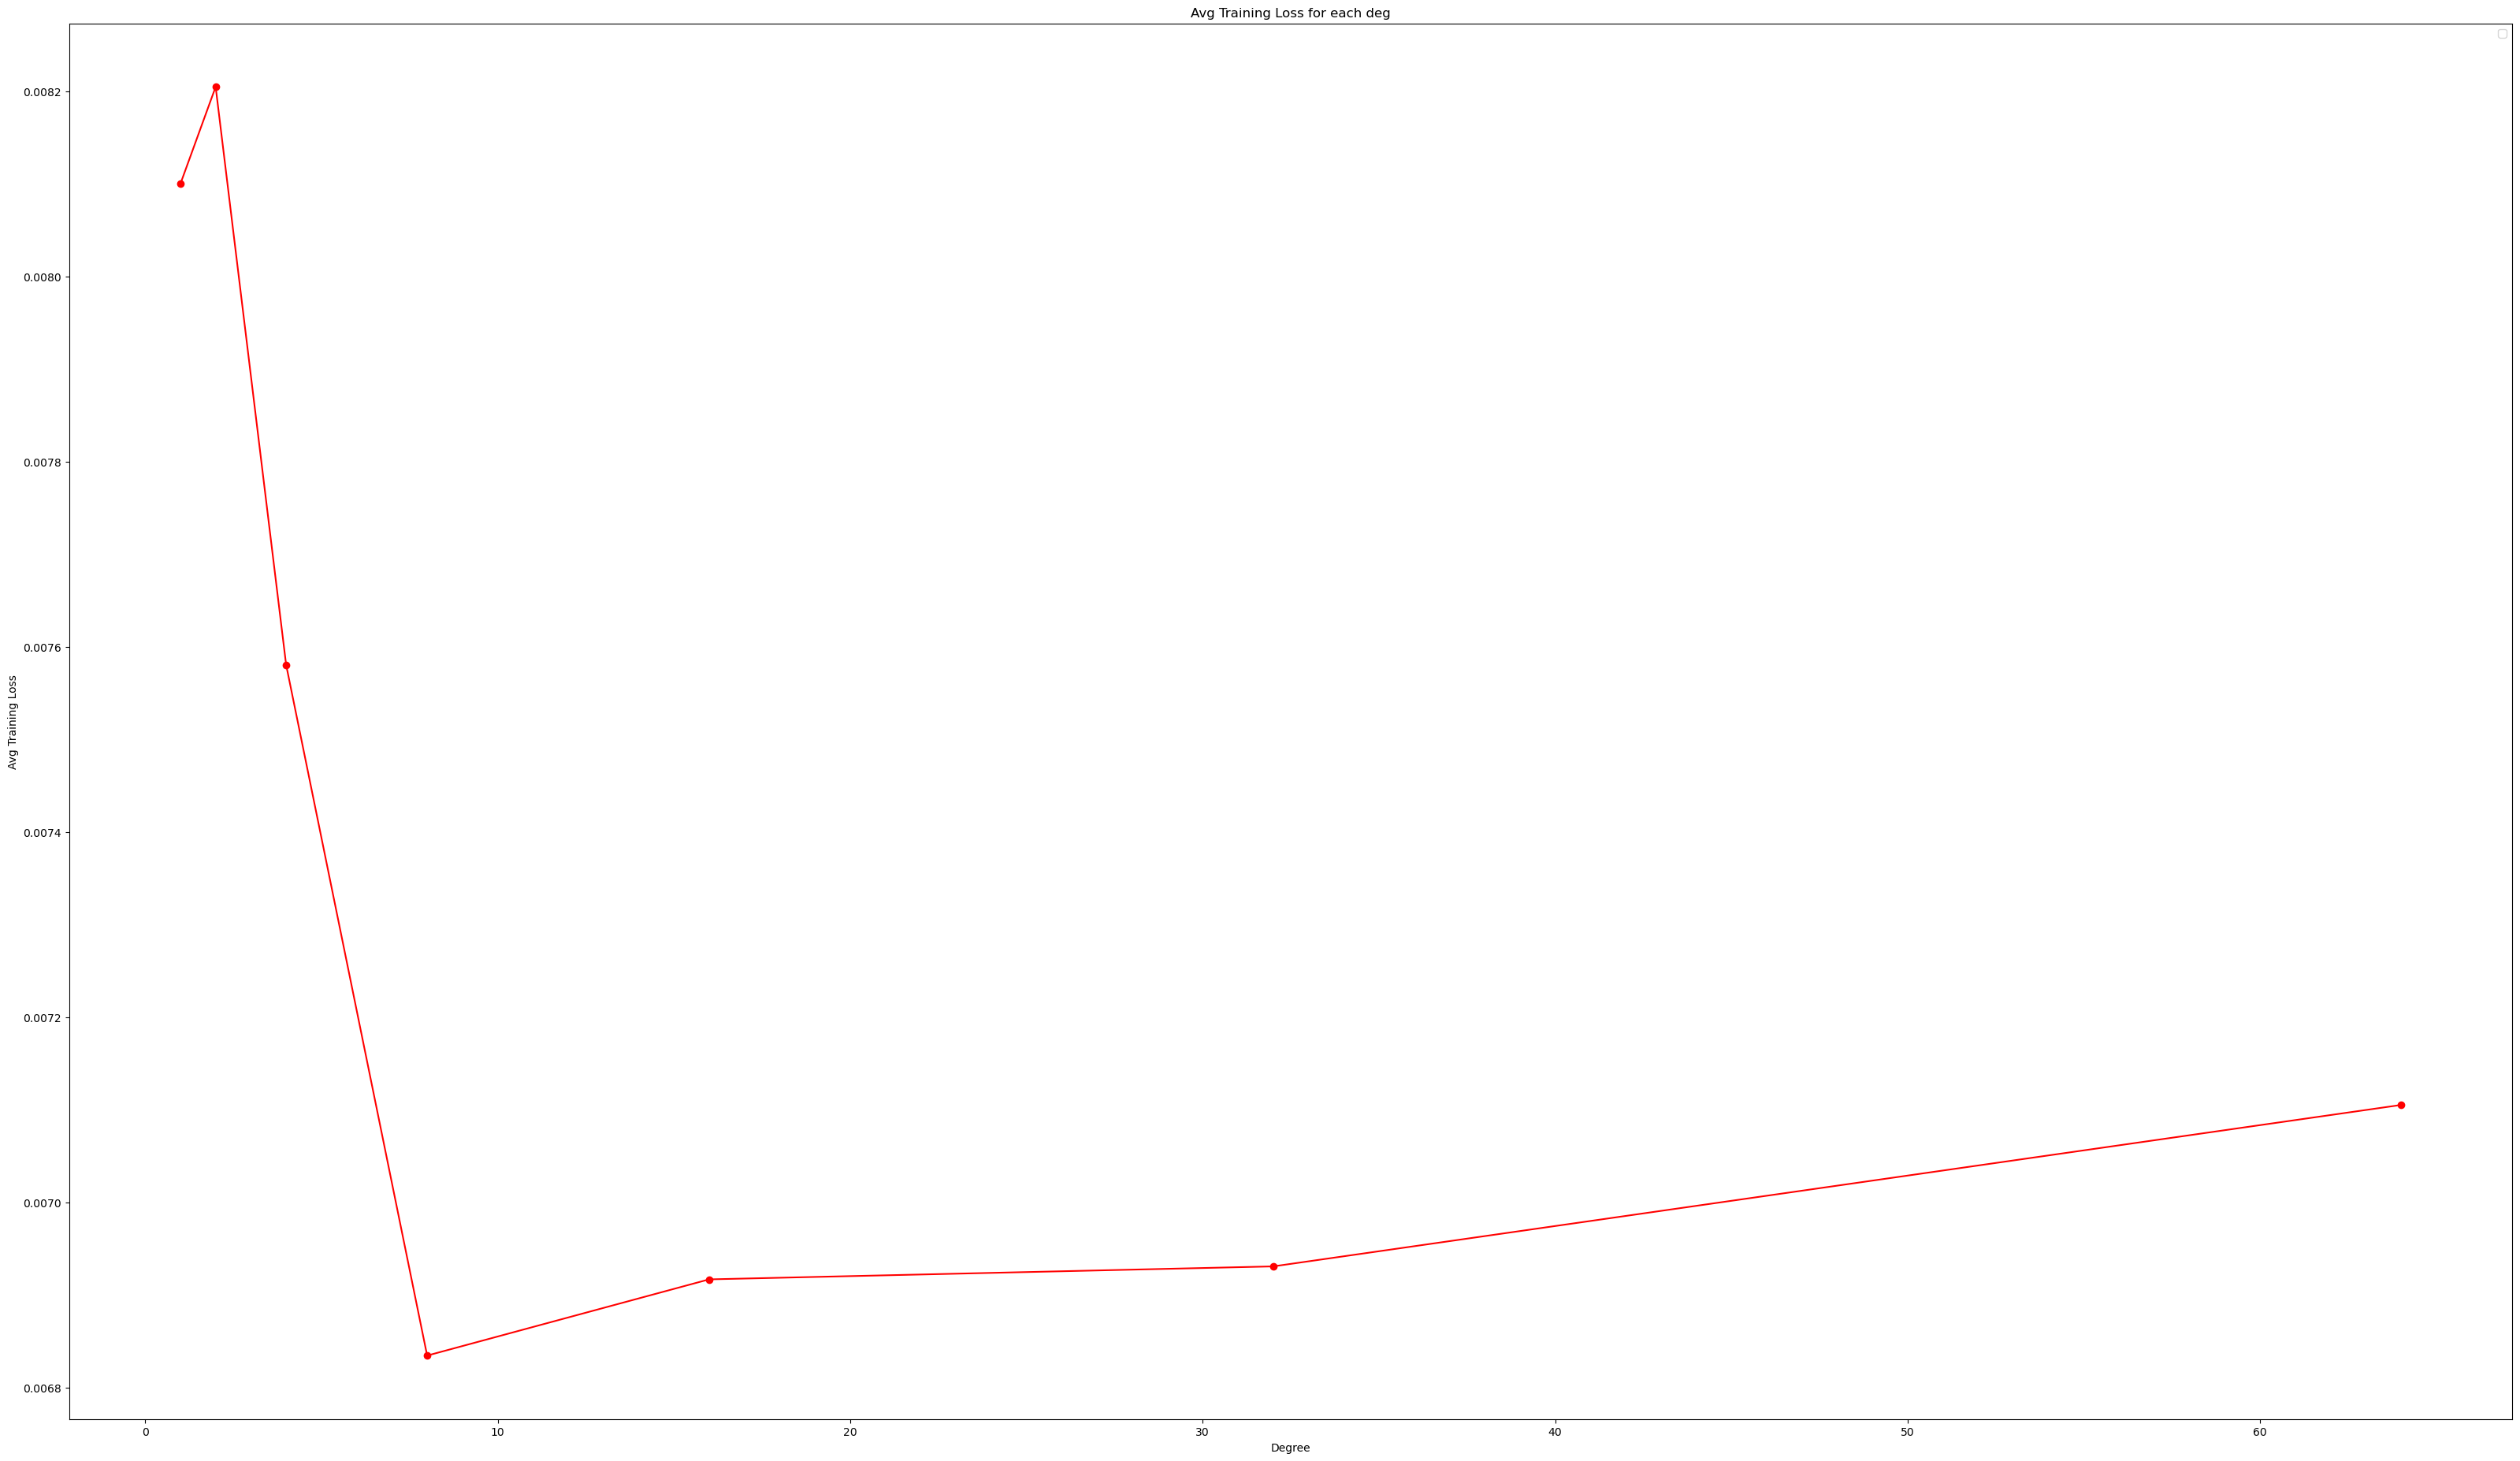

In [58]:
#avg training loss plot
plot_single_train_loss(trainLossesForEachTrail)

In [ ]:
#deg1 across all 10 trails
# deg = 1
# for deg in degrees:
#     print("*"* 50)
#     print(f"ALL 10 TRIALS FOR DEGREE {deg}")
#     plot_train_loss_graphs(trainLossesForEachTrail[deg], deg)
#     print()

**TEST LOSS**

In [59]:
#test loss
def g(x):
    return 0.6 * x + 0.1

def test_loss(deg, c):
    loss = 0
    delx = 0.01
    for i in tqdm(range(0, 1001)):
        inp = torch.tensor([i * delx - 5], dtype=float64)
        loss += delx * (f(inp, deg, c) - g(inp)) ** 2
    return loss

def calculateTestLossesAcrossTrails(learntConstantsForEachTrail):
    #deg -> [all test losses for 10 trails]
    testLosses = {deg:[] for deg in degrees}
    testLossesStdDevs = {deg: None for deg in degrees}

    for deg in tqdm(learntConstantsForEachTrail):
        learntConstantsForDeg = learntConstantsForEachTrail[deg]
        #for each constant learnt in each of the 10 trials
        for learntConstantForDeg in learntConstantsForDeg:
            testLosses[deg].append(test_loss(deg, learntConstantForDeg))

        testLosses[deg] = torch.tensor(testLosses[deg])
        testLossesStdDevs[deg] = torch.std(testLosses[deg]).item()
    return testLosses, testLossesStdDevs

testLosses, testLossesStdDevs = calculateTestLossesAcrossTrails(learntConstantsForEachTrail)

100%|██████████| 1001/1001 [00:00<00:00, 11608.77it/s]

100%|██████████| 1001/1001 [00:00<00:00, 11963.03it/s]

100%|██████████| 1001/1001 [00:00<00:00, 12681.30it/s]

100%|██████████| 1001/1001 [00:00<00:00, 15862.48it/s]

100%|██████████| 1001/1001 [00:00<00:00, 11351.53it/s]

100%|██████████| 1001/1001 [00:00<00:00, 12796.24it/s]

100%|██████████| 1001/1001 [00:00<00:00, 12593.43it/s]

100%|██████████| 1001/1001 [00:00<00:00, 12775.99it/s]

100%|██████████| 1001/1001 [00:00<00:00, 13984.79it/s]

100%|██████████| 1001/1001 [00:00<00:00, 11863.01it/s]

100%|██████████| 1001/1001 [00:00<00:00, 12257.75it/s]

100%|██████████| 1001/1001 [00:00<00:00, 10532.03it/s]

100%|██████████| 1001/1001 [00:00<00:00, 12737.16it/s]

100%|██████████| 1001/1001 [00:00<00:00, 10587.56it/s]

100%|██████████| 1001/1001 [00:00<00:00, 11933.55it/s]

100%|██████████| 1001/1001 [00:00<00:00, 10601.79it/s]

100%|██████████| 1001/1001 [00:00<00:00, 12278.36it/s]

100%|██████████| 1001/1001 [00:00<00:00, 11880.7

In [66]:
import math

def round_number(number, precision=3):
    # Calculate the desired number of decimal places based on the exponent (0 in this case)
    exponent = math.floor(math.log10(abs(number)))
    decimal_places = max(0, precision - exponent)

    # Round the number to the calculated decimal places (3 in this case)
    return round(number, decimal_places)

def plot_test_loss_graphs(test_losses, testLossesStdDevs):
    avg_test_losses = [average(test_losses[deg]) for deg in test_losses]

    # Example labels for each line graph
    labels = [f"STD-{round_number(testLossesStdDevs[deg])}" for deg in degrees]

    # Create a figure
    plt.figure(figsize=(85, 55))

    plt.plot(degrees, avg_test_losses, color="red", marker="o")

    # Add labels to the points
    for i, label in enumerate(labels):
        plt.text(degrees[i], avg_test_losses[i], label, fontsize=13, ha='right', va='bottom')

    # Add legend
    plt.legend()
    # Set labels and title
    plt.xlabel('Degree')
    plt.ylabel('Avg Testing Loss')
    plt.title(f"Avg Testing Loss vs Degree (with std dev as points)")
    plt.grid(True)
    #save to disk
    plt.savefig(f"./plots/Avg Testing loss vs Degree with std dev points.png")

    # Show the plot
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


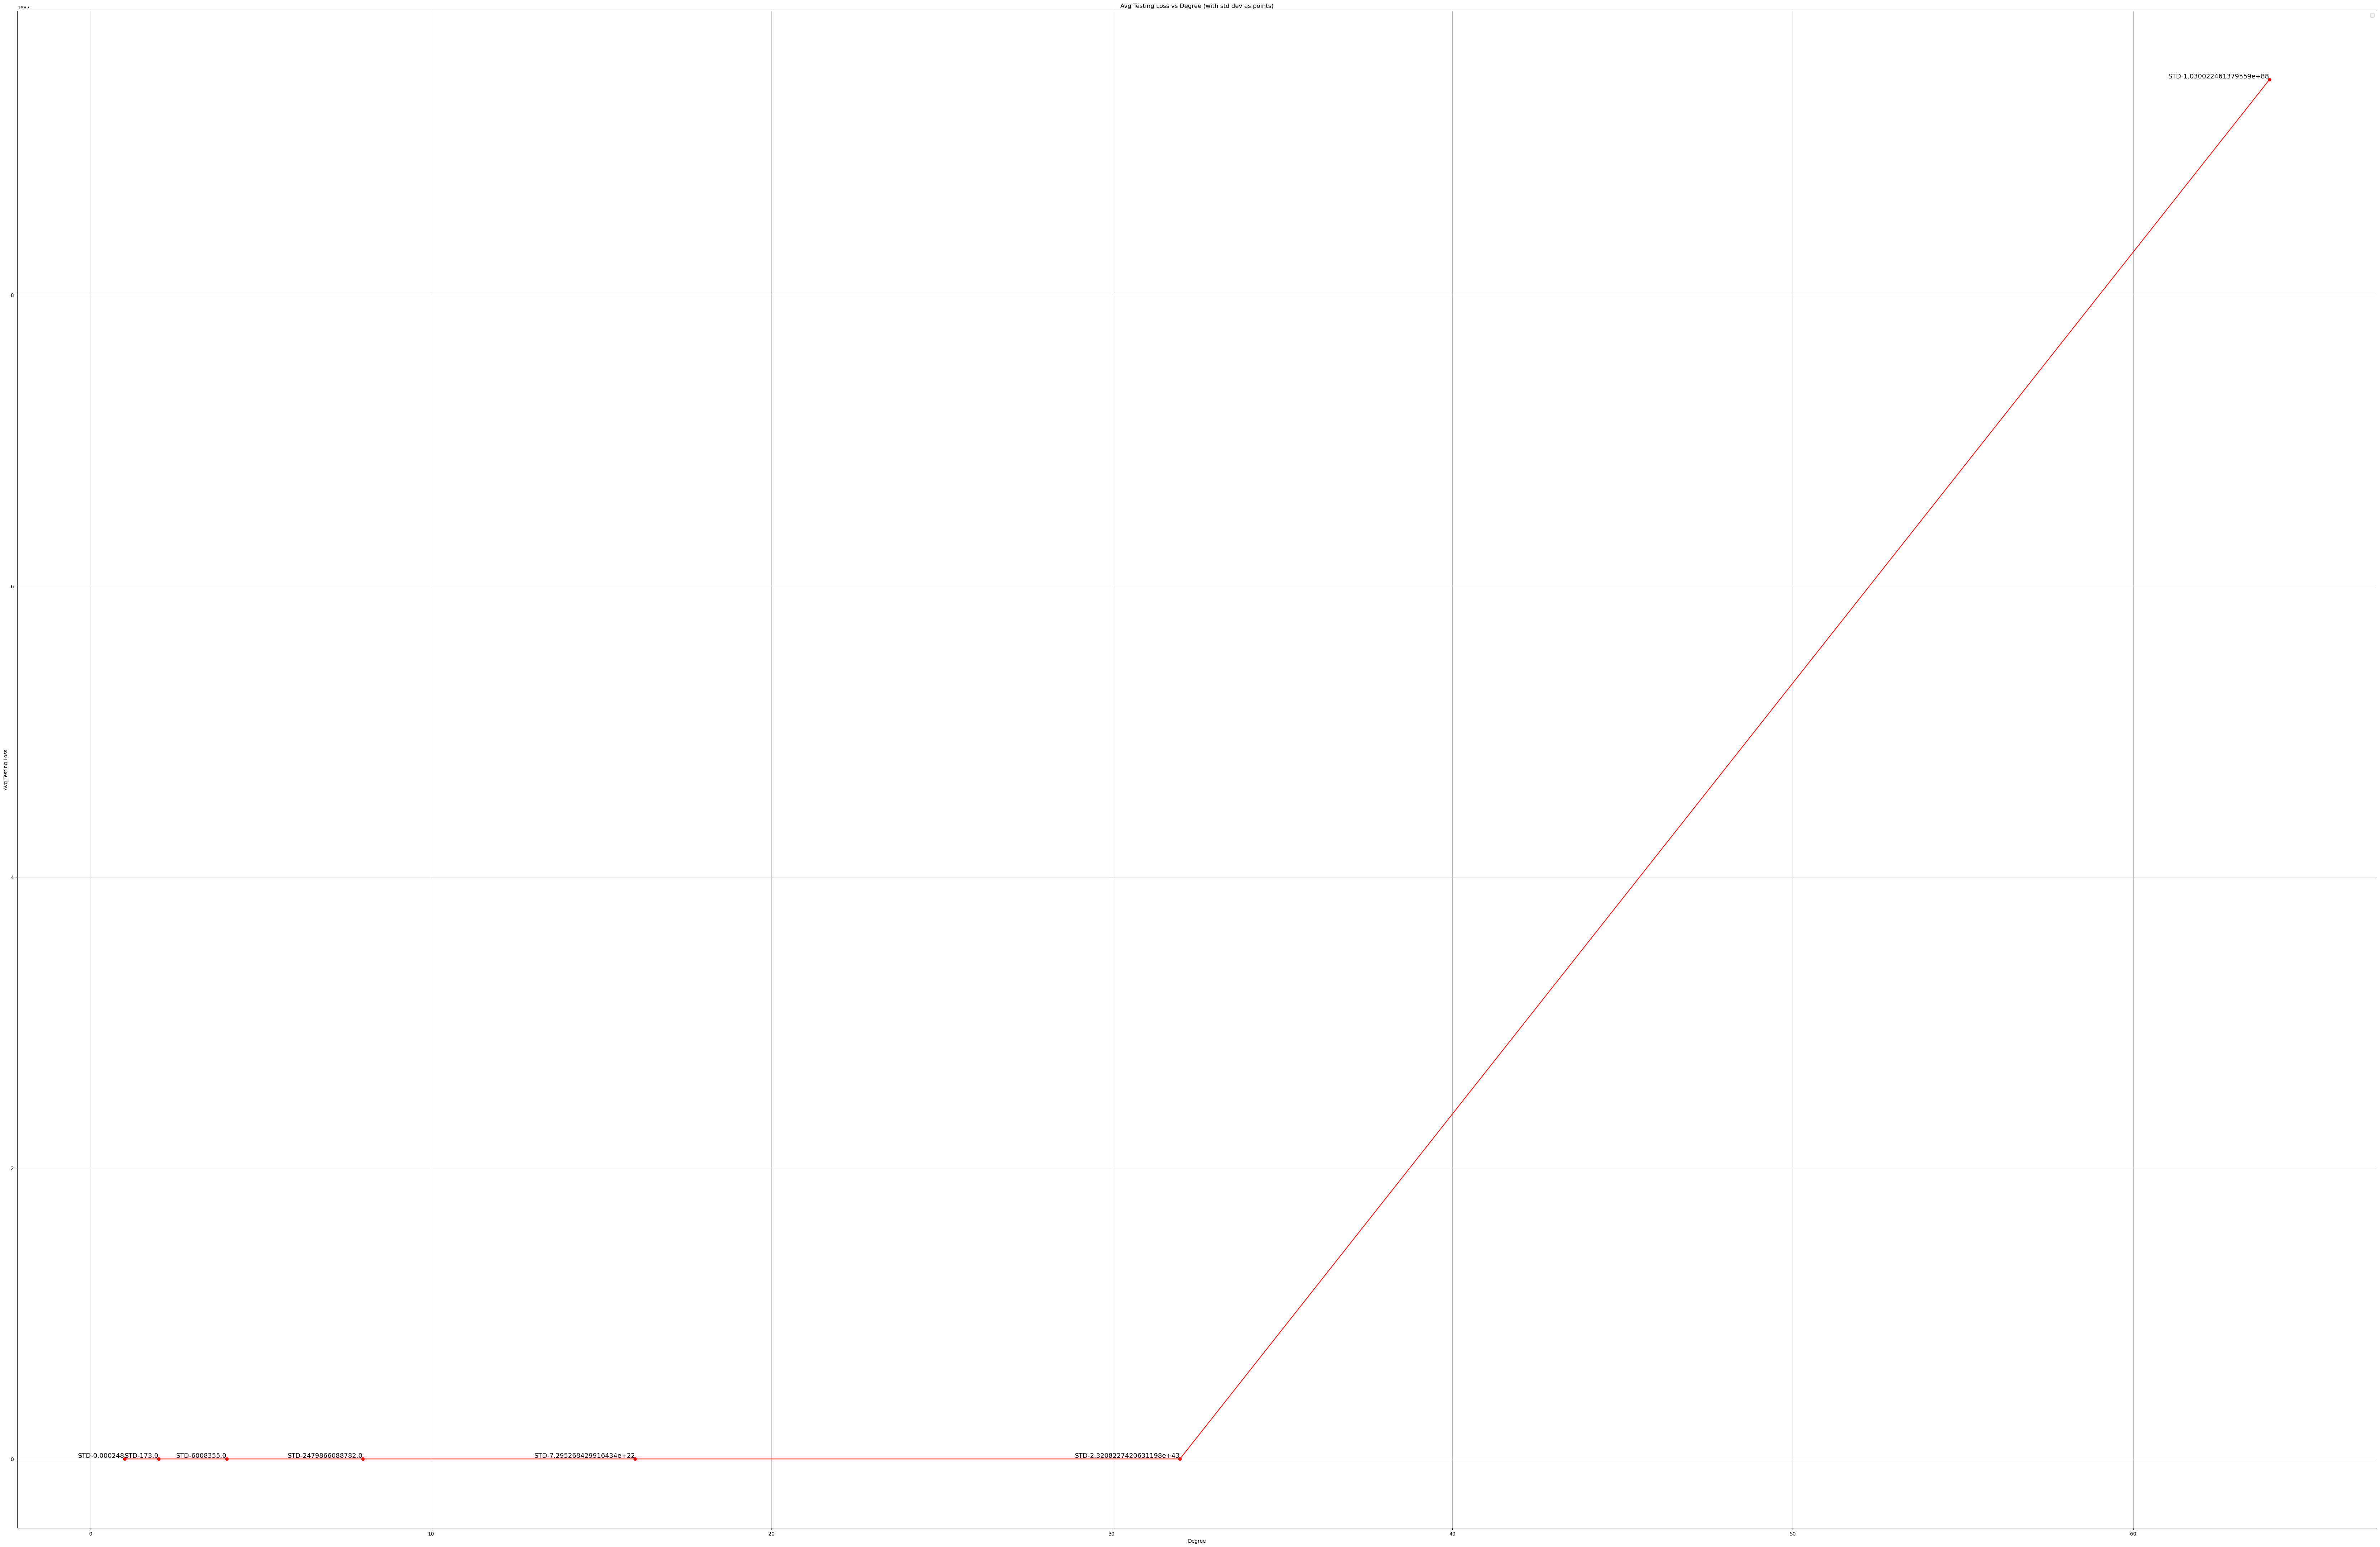

In [67]:
plot_test_loss_graphs(testLosses,testLossesStdDevs)